In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
# kilka metod przerzuciłem do pliku methods.py, aby poprawić czytelność notebooka
import methods
#pandas wyświetla w ładny sposób zbiory dzięki swoim DataFrame i Series
import pandas as pd
#ustawienie formatu obrazy svg, aby był lepszej jakości

Wczytanie danych

In [2]:
#wczytanie danych do zbiorów
train_set=np.genfromtxt('train_set.csv',delimiter=';',dtype=float)
test_set=np.genfromtxt('test_set.csv',delimiter=';',dtype=float)

1. Zaprezentowanie danych treningowych na wykresie:


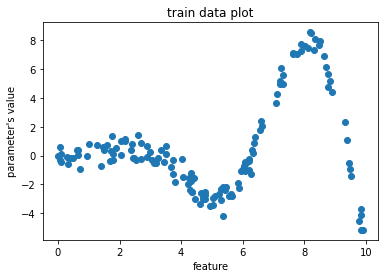

In [3]:
plt.scatter(x=train_set[:,0],y=train_set[:,1])
# ustawienie tytułu
plt.title("train data plot") 
# podpis osi
plt.xlabel("feature") 
plt.ylabel("parameter's value")
plt.show()

2. Trenowanie regresji wielomianowej dla różnych wielomianów.  
Zaprezentowanie rozkładu gęstości błędów.

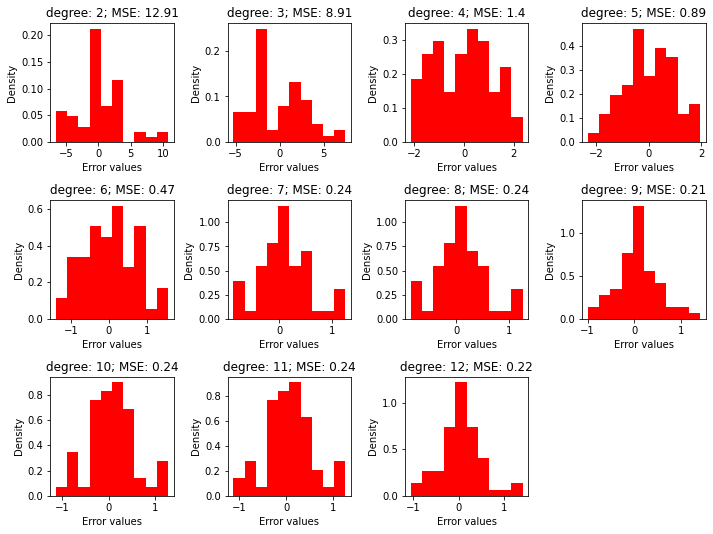

In [4]:
optimal_model, mse = methods.prepare_regression(train_set, test_set,12)

3. Współczynniki wielomianu o najmniejszym błędzie kwadratowym:

In [5]:
pd.DataFrame(optimal_model.coef_[0].round(2), columns=['coefficients'])

,coefficients
0,0.00
1,-1.01
2,2.84
3,-3.03
4,1.85
5,-0.66
6,0.13
7,-0.01
8,0.00
9,-0.00


4.Wyświetlić zbiory, optymalny model oraz w tytule błąd średnio kwadratowy

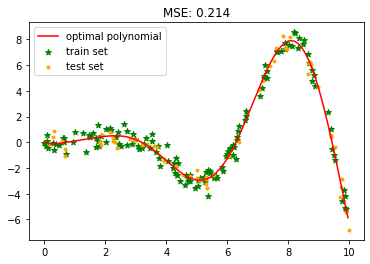

In [6]:
# WYKRES WIELOMIANU

# przygotowanie zbioru argumentów
x_for_plt=np.arange(0,10,0.05).reshape(200,1)

#Wyliczenie wartości
pol_feat=PolynomialFeatures(degree=optimal_model.rank_)
y_for_plt=optimal_model.predict(pol_feat.fit_transform(x_for_plt))

#narysowanie wykresu wielomianu
plt.plot(x_for_plt,y_for_plt,color='r',label="optimal polynomial") 
#utworzenie obiektu PF o stopniu wybranego wielomianu

#UTWORZENIE POZOSTAŁYCH WYKRESÓW

# wykres zbioru treningowego
plt.scatter(train_set[:,0],train_set[:,1],color='g',marker="*",label="train set") 

# wykres zbioru testowego
plt.scatter(test_set[:,0],test_set[:,1],color='orange',marker=".",label="test set")

# tytuł - błąd średniokwadratowy (w odniesieniu do zbioru testowego), 3 miejsca po przecinku
plt.title(f"MSE: {round(mse,3)}") 

plt.legend(loc="upper left") #legenda
plt.show()